# Travail Personnel d'analyse numérique - MATH-F3414
# Année académique 2022-2023

``If this code works, the author is Juian Moeil. Otherwise, I have no idea who the author is.``

*Remarque: en soumettant ce travail, vous vous engagez à le faire de manière individuelle. Tout plagiat sera sanctionné selon le réglement en vigueur à l'Université Libre de Bruxelles.* - OK

*La date limite de remise de ce travail est le 24/12/2021 à 11h59:59s. Après cette date, il ne sera pas comptabilisé.*

## Introduction

L'équation (non-linéaire) de Korteweg-de-Vries (KdV) permet par exemple de modéliser la propagation faiblement non-linéaire d'ondes en eau peu profonde. Elle peut s'écrire sous la forme:

$$
\frac{\partial u}{\partial t} +  3 \frac{\partial u^2}{\partial x} + \frac{\partial^3 u}{\partial x^3}=0
$$

## Partie 1

Cette équation admet des solutions qui se propagent sans déformations et qui s'appellent des 'solitons'. Ces solitons prennent la forme suivante:

$$
u(x,t) = u_0(x-ct)
$$
avec
$$
u_0(x) = \frac{c}{2}\textrm{sech}^2(\frac{\sqrt{c}}{2}(x-a))
$$
où $\textrm{sech}$ est la fonction sécante hyperbolique et $c, a$ sont des constantes.

Dans cette partie du travail on résoudra l'équation dans l'interval $x\in [0,L]$ qui est discrétisé aux $nx=401$ points $x_j$ suivants:

$$
x_j = j\Delta x,\; j \in [0,...,nx - 1],\; \Delta x = \frac{L}{nx-1}
$$

En dehors de cet interval, on fait l'hypothèse que $u(x,t)=0, \forall t$.

### Question 1

a) Intégrer l'équation de KdV dans un interval de longueur $L=100$ jusqu'en $t=30$ et vérifier graphiquement qu'à cet instant la solution s'obtient bien en translatant la condition initiale sans déformation.

Pour les opérateurs différentiels on prendra des formules de différences finies centrées d'ordre 2 (sous forme matricielle) et on utilisera la méthode Runge-Kutta 4 vue au cours pour l'algorithme d'avancement dans le temps (choisir un pas de temps qui permet d'obtenir une solution qualitativement acceptable). 

Pour les paramètres de la condition initiale on choisit $c=2$ et $a=20$.

#### Solution proposée - Soliton unique

Pour résoudre l'équation de KdV pour les conditions initiales données en utilisant la méthode RK4, nous devons d'abord écrire les différences finies centrées d'ordre 2 pour les dérivées première et troisième par rapport à x, qui sont données par, en prenant les notations du cours:

\begin{equation}
    \frac{\partial u}{\partial x} = u_j' \approx \frac{u_{j+1}-u_{j-1}}{2\Delta x}
\end{equation}

\begin{equation}
    \frac{\partial^3 u}{\partial x^3} = u_j''' \approx \frac{-u_{j-2} +2\left(u_{j-1}-u_{j+1}\right)+ u_{j+2}}{2(\Delta x)^3}
\end{equation}

Où $\Delta x$ est la distance entre deux points de discrétisation consécutifs. Nous pouvons maintenant écrire l'équation de KdV sous la forme d'une EDO:

\begin{equation}
    \frac{\partial u}{\partial t} = -3 \frac{\partial u^2}{\partial x} - \frac{\partial^3 u}{\partial x^3}
\end{equation}

De plus, notons l'égalité

\begin{equation}
    \frac{\partial u^2}{\partial x} = 2u\frac{\partial u}{\partial x}
\end{equation}

En utilisant les différences finies centrées d'ordre 2 pour les dérivées, nous pouvons écrire cette équation sous la forme suivante:

\begin{equation}
    \frac{\partial u}{\partial t} = -6 u_j\frac{-u_{j-2} +2\left(u_{j-1}-u_{j+1}\right)+ u_{j+2}}{2\left(\Delta x\right)^3} - \frac{u_{j+1}-u_{j-1}}{2\Delta x}
\end{equation}

Nous pouvons maintenant utiliser la méthode RK4 pour résoudre cette équation. La méthode RK4 est un schéma itératif qui calcule approximativement la valeur de la fonction u(x,t) au temps suivant en utilisant la valeur actuelle et quatre valeurs intermédiaires calculées à partir de la valeur actuelle et de ses dérivées. Ces valeurs intermédiaires sont calculées en utilisant les équations suivantes:

\begin{equation}
    \begin{cases}
        k_1 &= f(t_j,u_j)\\
        k_2 &= f(t_j + \frac{\Delta t}{2},u_j+\frac{\Delta t}{2}k_1)\\
        k_3 &= f(t_j + \frac{\Delta t}{2},u_j+\frac{\Delta t}{2}k_2)\\
        k_4 &= f(t_j+\Delta t,u_j+\Delta k_3)
    \end{cases}
\end{equation}

La valeur de la fonction u(x,t) au temps suivant est alors approximée en utilisant la formule suivante:

\begin{equation}
    u_{j}^{n+1} = u_{j}^{n} + \frac{1}{6} (k_1 + 2\left(k_2 + k_3\right) + k_4)
\end{equation}

Où $u_{j}^{n}$ est la valeur de la fonction au point j et au temps n, et $k_1$, $k_2$, $k_3$ et $k_4$ sont les valeurs intermédiaires calculées précédemment.

Nous pouvons maintenant écrire un script en utilisant ces équations pour résoudre l'équation de KdV pour les conditions initiales données, en utilisant des valeurs de $L = 100$, $c = 2$ et $a = 20$, et en continuant jusqu'en $t = 30$.

In [1]:
from TP import *

Cette commande permet d'aller chercher dans le fichier `TP.py` l'ensemble des fonctions qui y sont définies, et de l'importer dans le code. Mentionnons que cette ligne va également permettre l'importation de différents modules tel que `numpy`, `matplotlib.pyplot` ainsi que la fonction `diags` définie dans `scipy.sparse`.

Ayant rédigé ces fonctions implémentant la procédure définie précédemment, utilisons-les ci-dessous.

In [2]:
# --- List of global variables --- 

# Space interval
xi,xf = 0.0,100.0
L = 100
nx = 401
dx = L/(nx-1)
x = np.array([i * dx for i in range(nx)])

# Time interval
ti,tf = 0.0,30.0
dt = 0.01 # Check if solution acceptable 
nt = int((tf-ti)/dt)

# Other constants
c = 2 
c2 = 1
a = 20
a2 = 40

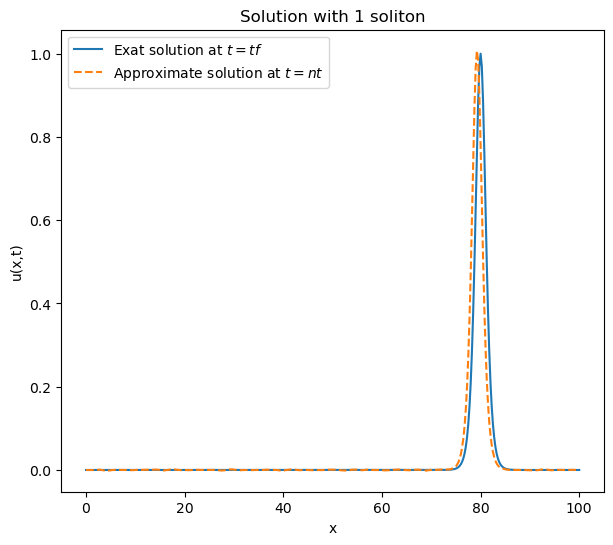

In [3]:
e = 0 # Boolean argument that is set to 0 for the first question, and 1 for the second.
def main():
    # Solution array 
    u = solution_soliton(x,dx,nx,dt,nt,a,c,e,c2,a2)
    
    # Plotting section
    fig, ax = plt.subplots(1, 1, figsize=(7,6))
    ax.plot(x, soliton(x, tf, c, a), label="Exat solution at $t = tf$")
    ax.plot(x, u[nt], '--',label="Approximate solution at $t = nt$")


    ax.set_xlabel("x")
    ax.set_ylabel("u(x,t)")
    ax.set_title('Solution with 1 soliton')
    ax.legend()
    plt.show()
main()

### Question 2

- Répéter le calcul de la question en rajoutant à la condition initiale un deuxième soliton pour lequel $c=1$ et $a=40$.
- Faire une animation de votre simulation qui montre que les deux solitons entrent en collision mais resortent de celle-ci sans déformation.

#### Solution proposée - deux solitons indépendants

On utilise le même code, avec `e = 1` plutôt que `0`.

On implémente un code pour l'animation de la solution.

**NOTE** : 
- Pour une raison que j'ignore, si je met la fonction `animate` définie ci-contre dans le module `TP.py` le code ne fonctionne pas. Je me permet donc de le définir directement ici.
- Faire apparaître l'animation directement dans ce fichier coute en temps. C'est pourquoi nous prenons ici le choix de créer un fichier `*.gif`. On gagne ce faisant en temps de compilation.

In [4]:
def animate(time,dt,s):
    """Modifies the line representing u and
    the text indicating the corresponding time
    
    Parameters
    ----------
    time : float
        time at which to plot u
    
    Returns
    -------
    line : updated line
    time_text : update text indicating time
    """
    
    # array index corresponding to time
    j = int(time/dt)
    
    # update the line.
    line.set_ydata(s[j])
    
    # update the time text.
    # j*dt is displayed with two digits
    # after the decimal point
    time_text.set_text(f't={time:.2f}')
    
    # return the updated data to FuncAnimation
    return line, time_text

MovieWriter imagemagick unavailable; using Pillow instead.


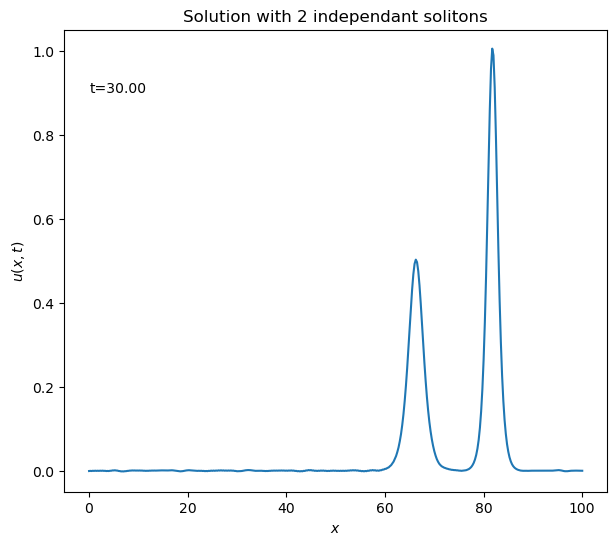

In [5]:
e = 1 # Boolean argument that is set to 0 for the first question, and 1 for the second.
s = solution_soliton(x,dx,nx,dt,nt,a,c,e,c2,a2) # Solution array

fig, ax2 = plt.subplots(1, 1, figsize=(7,6))
line, = ax2.plot(x, s[0])
time_text = ax2.text(0.1, 0.9, 't=0')

ax2.set_xlabel('$x$')
ax2.set_ylabel('$u(x,t)$')
ax2.set_title('Solution with 2 independant solitons')

step = nt/90
times = np.arange(0, nt+step, step)*dt
fargs = dt,s

ani = animation.FuncAnimation(
    fig, animate, interval=100, frames=times, repeat=True,fargs=fargs)
ani.save('solitons.gif',writer='imagemagick')

## Partie 2

Dans cette partie du travail nous allons résoudre l'équation de KdV dans un **interval périodique** de période $L$ pour lequel $u(x+L,t)=u(x,t)$.

### Question 3

Résoudre l'équation de KdV dans un interval périodique avec:

```
L = 40
nx = 401
dt = 0.0001
```

avec comme condition initiale: $ u_0(x) = \frac{10}{3}\cos(\frac{\pi x}{20})$.

a) Représenter graphiquement votre solution pour $t=4$.

#### Solution proposée

En ce qui concerne les conditions périodiques, on se propose de continuer à utiliser les différences finies centrées développées précédemment. 

\begin{align}
    u_j'&\approx \frac{u_{j+1}-u_{j-1}}{2\Delta x}\\
    u_j''' &\approx \frac{-u_{j-2} +2\left(u_{j-1}-u_{j+1}\right)+ u_{j+2}}{2(\Delta x)^3}
\end{align}

Pour implémenter une solution périodique, nous utilisons la notion de $u_{ghost}$ vue dans le cours:
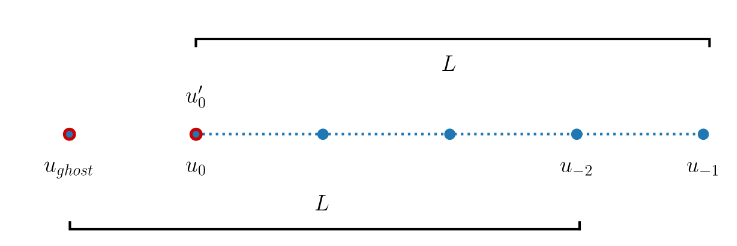

En appliquant cela aux relations ci-dessus, nous obtenons les relations suivantes:

\begin{align}
    u_0' &= \frac{u_1-u_{-2}}{2\Delta x}\\
    u_{nx-1}' &= \frac{u_1-u_{nx-2}}{2\Delta x}\\
\end{align}

\begin{align}
    u_0''' &= \frac{-\frac{1}{2}u_{nx-3}+u_{nx-2}-u_{1}+\frac{1}{2}u_2}{\Delta x^3}\\
    u_{1}''' &= \frac{-\frac{1}{2}u_{nx-2}+u_0-u_2+\frac{1}{2}u_3}{\Delta x^3}\\
    u_{nx-2}''' &= \frac{-\frac{1}{2}u_{nx-4}+u_{nx-3}-u_{nx-1}+\frac{1}{2}u_{1}}{\Delta x^3}\\
    u_{nx-1}''' &= \frac{-\frac{1}{2}u_{nx-3}+u_{nx-2}-u_1+\frac{1}{2}u_{2}}{\Delta x^3}
\end{align}

Implémentons ces conditions dans `solution_periodic`.

MovieWriter Pillow unavailable; using Pillow instead.


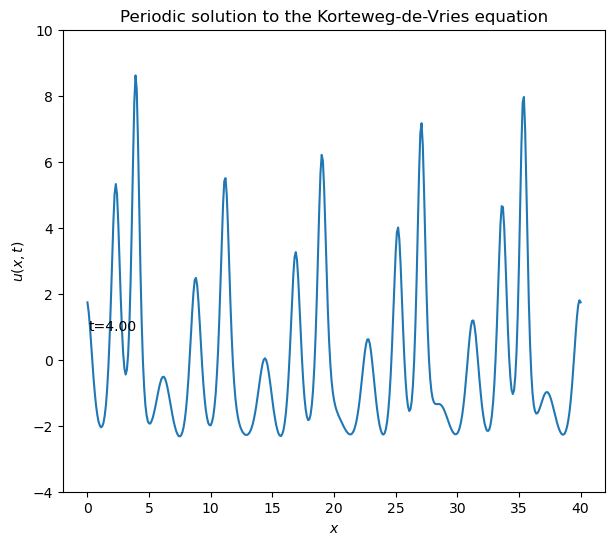

In [6]:
xi,xf = 0.0,100.0
L = 40
nx = 401
dx = L/(nx-1)
x = np.array([i * dx for i in range(nx)])
ti,tf = 0,4
dt = 0.0001
nt = int((tf-ti)/dt)

s = solution_periodic(x,dx,nx,dt,nt) # Solution array 

fig, ax = plt.subplots(1, 1, figsize=(7,6))
line, = ax.plot(x, s[0])
time_text = ax.text(0.1, 0.9, 't=0')

ax.set_xlabel('$x$')
ax.set_ylabel('$u(x,t)$')
ax.set_ylim(-4,10)
ax.set_title('Periodic solution to the Korteweg-de-Vries equation')
step = nt/90
times = np.arange(0, nt+step, step)*dt
fargs = dt,s

ani = animation.FuncAnimation(
    fig, animate, interval=100, frames=times, repeat=True,fargs=fargs)
ani.save('periodic.gif',writer='Pillow')

Observons que la solution initiale explose rapidement en une combinaison linéaire de solitons.

b) Que vaut $u(x=10,t=4)$ ?

Rappelons que nous travaillons sur une grille
\begin{equation}
    x_i = i\Delta x = i\frac{L}{nx-1}
\end{equation}
où $nx = 401$ et $L = 40$. Nous pouvons en déduire que $x = 10$ en l'indice `i = 100`.

Sur la grille temporelle, observons que $t = 4$ correspond au temps final. On se positionne donc en `nt`.

In [7]:
s[nt,100]

-1.9861538598339283

### Question 4

Refaire les calculs demandés à la question 3 mais en utilisant un algorithme explicite RK4 pour le terme $3\frac{\partial u^2}{\partial x}$ et l'algorithme Euler implicite pour le terme $\frac{\partial^3 u}{\partial x^3}$. Schématiquement on a:

$$
\frac{u^{n+1} - u^{n}}{dt} = -3 * RK4[\partial_x (u^n)^2] - \frac{\partial^3 u^{n+1}}{\partial x^3}
$$

Comme pas de temps on prendra:

```
dt = 0.00001
```


**Attention:** votre solution ne sera que qualitativement égale à celle de la question 3 (voir question 5).

#### Solution proposée

Pour résoudre ce problème, nous allons exploiter une approximation d'Euler implicite pour la première dérivée spatiale, et une approximation RK4 pour la dérivée troisième. En particulier, le problème s'écrit comme suit

\begin{equation}
    u^{n+1} +dt\frac{\partial^3 u^{n+1}}{\partial x^3} = u^n -3dtRK4[\partial_x (u^n)^2]
\end{equation}
L'opération de dérivée troisième s'approxime comme un opérateur linéaire. Notons là $A$. Alors,
\begin{align}
    u^{n+1}\left(I+Adt\right) &= u^n -3dtRK4[\partial_x (u^n)^2]\\
    u^{n+1} &= (I+Adt)^{-1}\left(u^n -3dtRK4[\partial_x (u^n)^2]\right)
\end{align}





In [23]:
from TP import *

xi,xf = 0.0,100.0
L = 40
nx = 401
dx = L/(nx-1)
x = np.array([i * dx for i in range(nx)])
ti,tf = 0,4
dt = 0.00001
nt = int((tf-ti)/dt)


A = d3_mat(nx,dx)
I = np.eye(nx,nx)
np.dot(np.linalg.inv(I+A),I+A)[1]

array([-1.98607660e-16,  1.00000000e+00, -2.09575375e-15, -9.46175035e-16,
        2.46866208e-15,  2.83781549e-15, -7.84186181e-15,  4.84054166e-15,
        6.49685829e-15, -1.56880190e-14,  5.06688054e-15,  1.52082429e-14,
       -5.59382007e-15, -2.19568258e-14,  5.74829357e-15,  9.56302982e-15,
        7.27275350e-15, -3.44264938e-15, -1.89948694e-14,  6.62875134e-15,
        3.74473783e-14, -3.62213398e-14, -2.56769646e-14,  5.46655816e-14,
       -2.64178914e-14,  1.08580053e-14,  6.35446413e-15, -3.21721675e-14,
        1.82356545e-14,  1.21329332e-14, -1.98006390e-14,  8.50517016e-15,
        7.68752856e-15,  8.46985765e-16, -1.39129339e-14, -1.38848340e-14,
        3.03172256e-14, -3.70567924e-15, -1.08648203e-14, -4.88540809e-16,
        8.04836143e-15, -5.68754406e-15, -1.45948360e-15,  1.21567879e-14,
       -9.39612819e-15, -4.99368138e-15,  8.03146808e-15,  2.72848288e-15,
       -9.78496839e-15,  1.83392479e-15,  1.53136630e-15,  5.00492506e-16,
        5.20645601e-15, -

MovieWriter Pillow unavailable; using Pillow instead.


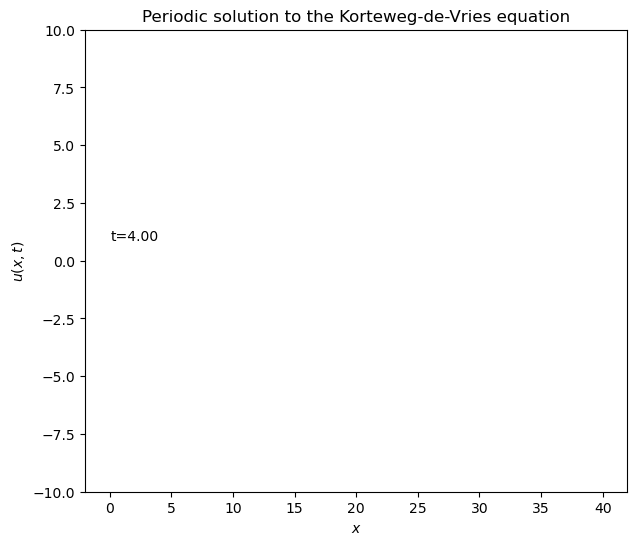

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
line, = ax.plot(x, s[0])
time_text = ax.text(0.1, 0.9, 't=0')

ax.set_xlabel('$x$')
ax.set_ylabel('$u(x,t)$')
ax.set_ylim(-10,10)
ax.set_title('Periodic solution to the Korteweg-de-Vries equation')
step = nt/90
times = np.arange(0, nt+step, step)*dt
fargs = dt,s

ani = animation.FuncAnimation(
    fig, animate, interval=100, frames=times, repeat=True,fargs=fargs)
ani.save('q4.gif',writer='Pillow')

### Question 5

Expliquer pourquoi les solutions obtenues aux questions 3 et 4 ne sont que qualitativement similaires. Comment pourriez-vous améliorer leur accord ?